#### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [1]:
import numpy as np

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

##### 1.1. Коэффициенты линейной регрессии с помощью формул для парной регрессии:
$$y = b_0 + b_1 x, где$$
$y$ - прогноз значения их поведенческого кредитного скоринга (scoring)  
$x$ - значения величины заработной платы заемщиков банка (salary)  
Для парной регрессии коэффициенты вычисляются по формулам:
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$  
Где $x$, $y$ — данные из выборки, $\overline{x}$ обозначает выборочное среднее

In [3]:
b1 = (np.mean(salary * scoring ) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

Итак, модель линейной регрессии имеет вид:

$$y = 444.18 + 2.62 \cdot x,$$


##### 1.2. Коэффициенты линейной регрессии с помощью метода наименьших квадратов:  
$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$

In [5]:
import pandas as pd
x2 = pd.DataFrame(salary)
y2 = pd.DataFrame(scoring)
x2.shape

(10, 1)

Добавляем столбец из 1, соответствующий фиктивному фактору.

In [6]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2.shape

(10, 2)

Запишем матрицу  $X^\top X$  и посчитаем её определитель.

In [7]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [8]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]


Расчет с помощью формул парной регрессии и метода наименьших квадратов дал практически одинаковые результаты.

##### 2. Построение scatter plot по данным и  линейной регрессии, полученной в п. 1.

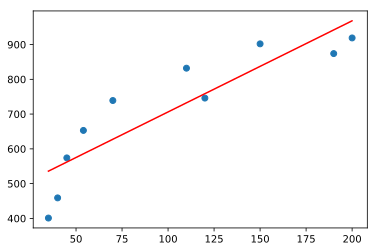

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red')

##### 3. Расчет коэффициент детерминации, среднюю ошибку аппроксимации.

In [10]:
pred_scoring = b0 + b1 * salary
R1 = pred_scoring.var() / scoring.var()
print(f'Итак, коэффициент детерминации:{R1}')

Итак, коэффициент детерминации:0.7876386635293678


In [11]:
np.corrcoef(salary, scoring) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

Cредняя ошибка аппроксимации:
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8-10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [12]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [13]:
A = mean_approximation_error(scoring, pred_scoring)
print(f'Cредняя ошибка аппроксимации:{A}')

Cредняя ошибка аппроксимации:0.11469251843561709


##### 4. Оценка построенное уравнение регрессии с помощью F-критерия Фишера.

Найдем соответствующую статистику

$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$

где $R^2$ - коэффициент детерминации, $n$ - число наблюдений, $k$ - число факторов. 

In [14]:
k1 = 1
k2 = salary.shape[0] - k1 -1
T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

29.67164085966437

In [15]:
salary.shape[0]

10

Для уровня значимости $\alpha = 0.05$ посчитаем по таблице значение $F_{crit} = F(1, 10)$.

In [16]:
from scipy import stats
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Т.к. $T > F_{crit}$ (29.67 > 5.31), поэтому уравнение регрессии статистически значимо.

##### 5. Оценка значимости получившихся параметров уравнения регрессии и построение для них доверительные интервалы с помощью t-статистики Стьюдента.

##### 5.1 Оценка значимости и построение доверитеоьного интревала для b1
Стандартной ошибки коэффициента наклона вычисляем по формуле:

$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}},$$

где:
* $x$, $x_i$ - соответственно, все значения и конкретное значение фактора
* $y_i$ - конкретное значение оцениваемой (целевой) переменной
* $z_i$ - "предсказанное" значение, полученное с помощью модели регрессии
* $n$ - число элементов в выборке


In [17]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [18]:
s_slope = standard_error_slope(salary, scoring, pred_scoring)
s_slope

0.48108279568516005

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \:8} = 2.306$. 

In [19]:
alpha = 0.05
t = stats.t.ppf(1 - alpha/2, salary.shape[0]-2)
t

2.3060041350333704

Значение статистики $T$:

In [20]:
T = b1 / s_slope
T

5.447168150485579

Интервал критиечской области:
    $$\Omega_\alpha = \left( -\infty, - t_{1 - \alpha/2, \: n - 2} \right) \cup \left( t_{1 - \alpha/2, \: n - 2}, \infty \right) = \left( -\infty, - 2.306 \right) \cup \left( 2.306, \infty \right).$$

Значение T попало в критическую область, значит, гипотеза о равенстве нулю параметра  b1 отвергается.

Доверительный интервал для параметра  b1 :

In [21]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

##### 5.2 Оценка значимости и построение доверитеоьного интревала для b0
Стандартная ошибка коэффициента сдвига вычисляется по формуле:

$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$$

In [22]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [23]:
s_intercept = standard_error_intercept(salary, scoring, pred_scoring)
s_intercept

56.46649755068153

Значение статистики  T :

In [24]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, значение параметра $b_0$ является значимым.

Доверительный интервал для параметра $b_0$:

In [25]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

##### Задача 2

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Таблица квантилей распределения Стьюдента:  
1. Случайная величина распределена по нормальному закону распределения
2. Параметры генеральной совокупности не известны


Таблица значений функции Лапласа применяется, если:
1. Случайная величина распределена по нормальному закону распределения
2. Параметры генеральной совокупности известны (среднее значение и дисперсия)